# This notebook tests the outputs of VESIcal for the Moore et al. (1998) model.
- This notebook relies on the Excel spreadsheet entitled: "Testing_Moore_et_al_1998.xlsx"
- Test 1 compares the experimental pressures in the H$_2$O-only experiments in the calibration dataset of Moore et al. (1998) with the saturation pressures obtained from VESIcal for the "MooreWater" model.  
- Test  

In [2]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [3]:
msp_fontdict = {'family': 'serif',
				 'color': 'darkblue',
				 'weight': 'normal',
				 'size': 18,}

plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.style.use("seaborn-colorblind")
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

# Test 1 - Comparing experimental pressures to those calculated from VESIcal

In [35]:
myfile= v.ExcelFile('Testing_Moore_et_al_1998.xlsx',   input_type='wtpercent', sheet_name='Calibration')
data = myfile.data
satPs_wtemps_Moore_Water=myfile.calculate_saturation_pressure(temperature="Temp", model='MooreWater')

/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:4387: RuntimeWarning: invalid value encountered in log
  two_ln_XH2Omelt = (aParam / temperatureK) + b_x_sum * (pressure/temperatureK) + cParam * np.log(fH2O) + dParam


### Calculating Linear regressions and plotting data

Text(4000, 4000, '1:1')

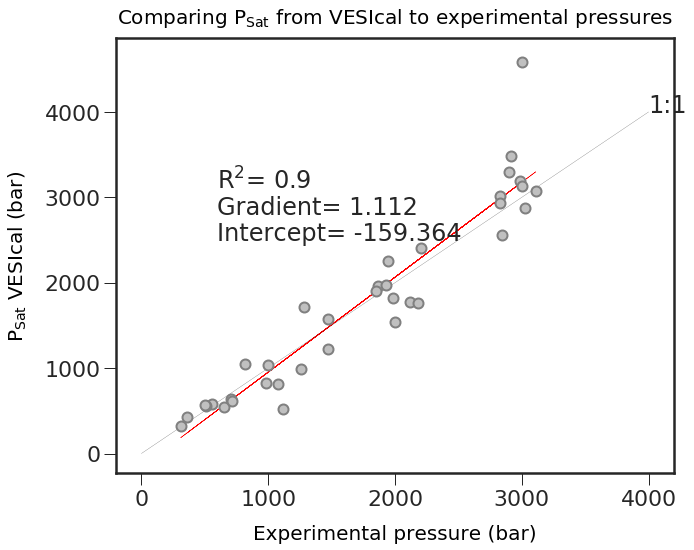

In [36]:
X_Test1=satPs_wtemps_Moore_Water['Press'] # Convert MPa from their supplement to bars
Y_Test1=satPs_wtemps_Moore_Water['SaturationP_bars_VESIcal']
mask_Test1 = (X_Test1>-1) & (Y_Test1>-1) #& (XComb<7000) # This gets rid of Nans
X_Test1noNan=X_Test1[mask_Test1].values.reshape(-1, 1)
Y_Test1noNan=Y_Test1[mask_Test1].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test1noNan,Y_Test1noNan)
Y_pred_Test1=lr.predict(X_Test1noNan)

fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparing P$_{Sat}$ from VESIcal to experimental pressures',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_Test1noNan,Y_pred_Test1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
plt.scatter(satPs_wtemps_Moore_Water['Press'], satPs_wtemps_Moore_Water['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 2)) 
one='1:1'
plt.plot([0, 4000], [0, 4000], color='k', linewidth=0.2)
plt.text(600, 2500, I)
plt.text(600,2800, G)
plt.text(600, 3100,  R)
plt.text(4000,4000,  one)

# Test 2 -Mimicing the spreadsheet. 
-  The excel spreadsheet of Moore et al. (1998) was used to calculate the wt% H$_2$O in the melt for a synthetic array of inputs provided as the sheet "synthetic". 

In [96]:
# Example for how curves were generated to overlay on Fig. 5
myfile_syn= v.ExcelFile('Testing_Moore_et_al_1998.xlsx',   input_type='wtpercent', sheet_name='Synthetic')
data_syn = myfile_syn.data
"""Calculate dissolved for all samples in an ExcelFile object"""
dissolved_syn = myfile_syn.calculate_dissolved_volatiles(temperature="Temp", pressure="Press", X_fluid="XH2OVapour", norm='fixedvolatiles', print_status=True, model='MooreWater')


## Comparing all inputs

Text(8, 8, '1:1')

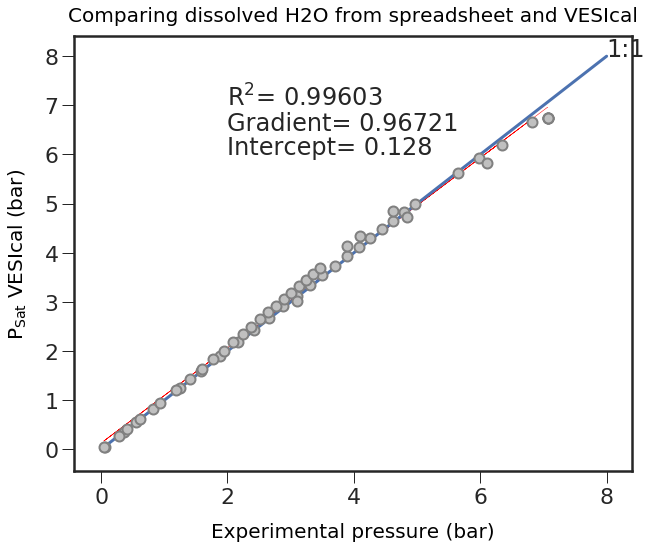

In [92]:
X_syn1=dissolved_syn['wt% H2O in melt'].values.reshape(-1, 1) # Convert MPa from their supplement to bars
Y_syn1=dissolved_syn['H2O_liq_VESIcal'].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_syn1,Y_syn1)
Y_pred_syn1=lr.predict(X_syn1)

fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparing dissolved H2O from spreadsheet and VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_syn1,Y_pred_syn1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
plt.scatter(dissolved_syn['wt% H2O in melt'], dissolved_syn['H2O_liq_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_syn1, Y_pred_syn1), 5)) 
one='1:1'
plt.plot([0, 8], [0, 8])
plt.text(2, 6, I)
plt.text(2, 6.5, G)
plt.text(2, 7, R)
plt.text(8, 8, one)

## Assessing discrepency vs Pressure for 1200C, XH2O=1

Text(0.5, 0, 'Pressure')

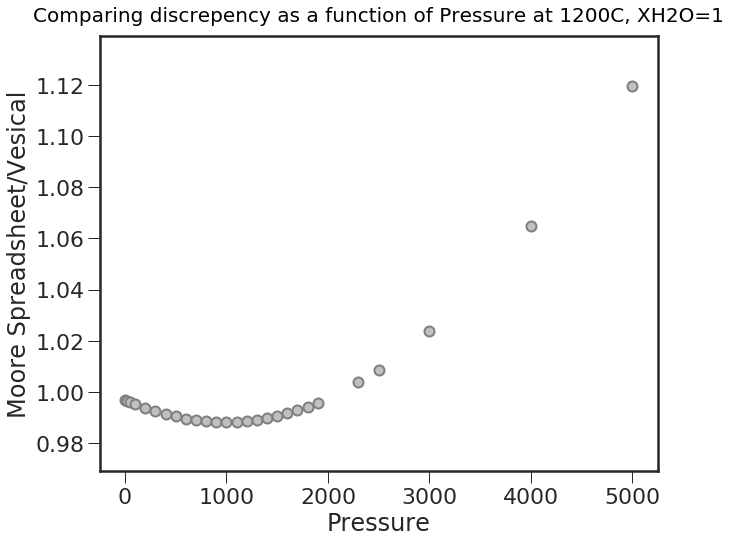

In [97]:
# Testing changing pressure
Diff=(dissolved_syn.loc[dissolved_syn.XH2OVapour==1, ['wt% H2O in melt']].values)/(dissolved_syn.loc[dissolved_syn.XH2OVapour==1, ['H2O_liq_VESIcal']].values)
X=dissolved_syn.loc[dissolved_syn.XH2OVapour==1, ['Press']].values
fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparing discrepency as a function of Pressure at 1200C, XH2O=1',
        fontdict= font, pad = 15)

plt.scatter(X, Diff, s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
plt.ylabel('Moore Spreadsheet/Vesical')
plt.xlabel('Pressure')

Text(0.5, 0, 'Pressure')

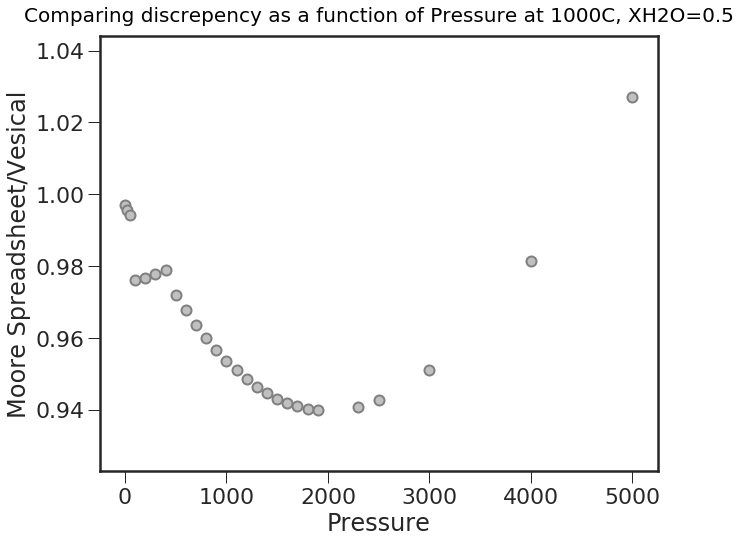

In [98]:
# Testing changing pressure
Diff=(dissolved_syn.loc[dissolved_syn.XH2OVapour==0.5, ['wt% H2O in melt']].values)/(dissolved_syn.loc[dissolved_syn.XH2OVapour==0.5, ['H2O_liq_VESIcal']].values)
X=dissolved_syn.loc[dissolved_syn.XH2OVapour==0.5, ['Press']].values
fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparing discrepency as a function of Pressure at 1000C, XH2O=0.5',
        fontdict= font, pad = 15)

plt.scatter(X, Diff, s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
plt.ylabel('Moore Spreadsheet/Vesical')
plt.xlabel('Pressure')